Import all the required modules.

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn import metrics

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Visualize the input data.

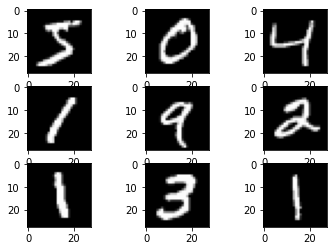

In [5]:
for i in range(1,10):
    plt.subplot(int("33"+str(i)))
    plt.imshow(x_train[i-1],cmap="gray")

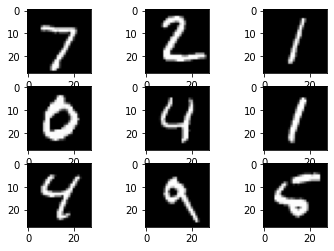

In [6]:
for i in range(1,10):
    plt.subplot(int("33"+str(i)))
    plt.imshow(x_test[i-1],cmap="gray")

Convert input data into mXn matrix

In [7]:
x_train=(x_train.reshape(60000,784))
x_test=(x_test.reshape(10000,784))

In [8]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Normalize input data from 0-255 to 0-1

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


Convert output vector into matrix of binary number(one hot encoding).

In [11]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [12]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
model=Sequential()
model.add(Dense(512,input_dim=784,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="mean_squared_error",optimizer="sgd",metrics=["accuracy"])
hist=model.fit(x_train,y_train,validation_split=0.17,epochs=20,batch_size=10)

Train on 49800 samples, validate on 10200 samples
Epoch 1/20
49800/49800 [==============================] - 42s 836us/step - loss: 0.0704 - accuracy: 0.5427 - val_loss: 0.0491 - val_accuracy: 0.7601
Epoch 2/20
49800/49800 [==============================] - 38s 768us/step - loss: 0.0390 - accuracy: 0.8045 - val_loss: 0.0287 - val_accuracy: 0.8628
Epoch 3/20
49800/49800 [==============================] - 38s 768us/step - loss: 0.0271 - accuracy: 0.8578 - val_loss: 0.0219 - val_accuracy: 0.8845
Epoch 4/20
49800/49800 [==============================] - 38s 771us/step - loss: 0.0224 - accuracy: 0.8748 - val_loss: 0.0189 - val_accuracy: 0.8944
Epoch 5/20
49800/49800 [==============================] - 39s 783us/step - loss: 0.0199 - accuracy: 0.8849 - val_loss: 0.0171 - val_accuracy: 0.9025
Epoch 6/20
49800/49800 [==============================] - 39s 778us/step - loss: 0.0183 - accuracy: 0.8921 - val_loss: 0.0160 - val_accuracy: 0.9067
Epoch 7/20
49800/49800 [==============================] 

In [14]:
pred=model.predict_classes(x_test)

In [15]:
print(pred)

[7 2 1 ... 4 5 6]


Convert predicted data into matrix of binary number.

In [16]:
pred=np_utils.to_categorical(pred,10)

In [17]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Plot the performance of the model.

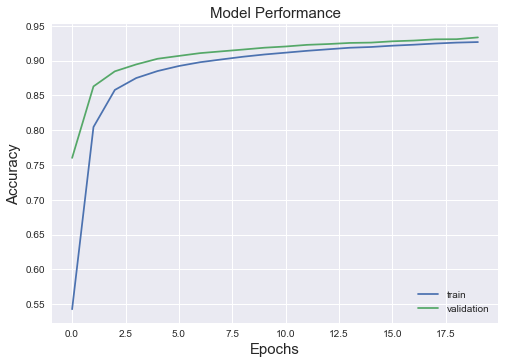

In [18]:
plt.style.use("seaborn")
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel("Epochs",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("Model Performance",size=15)
plt.legend(["train","validation"],loc="lower right")
plt.show()

In [19]:
print("Accuracy of the model ->",metrics.accuracy_score(y_test,pred)*100)

Accuracy of the model -> 93.10000000000001
